#Data Processing and Cleaning For EDA

  In this task, the focus is on preparing the collected datasets for analysis by addressing various data quality issues.
  
  The process involves inspecting the raw data to identify and resolve problems such as **missing values**, **duplicate entries**, and **irrelevant features**. Additionally, data preprocessing techniques such as **normalization**, **standardization**, or **transformations** may be applied to enhance the usability of the data.


---



In [2]:
import pandas as pd
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load datasets
survey_df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Raw Data Files/Survey.xlsx")
twitter_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Raw Data Files/posts.csv")
tripadvisor_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Raw Data Files/tripadvisor-scraper.csv")
booking_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Raw Data Files/booking-com-reviews-scraper.csv")
#Ministry of Tourism data sheets
ministryI1_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/I1-Inbound-Tourism-Key-Indicators.csv")
ministryD1_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/D1-Domestic-Tourism-Key-Indicators.csv")
ministryI2_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/I2-Inbound-Tourists-Number-Main-Purpose.csv")
ministryD2_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/D2-Domestic-Tourists-Number-Main-Purpose.csv")
ministryI5_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/I5-Inbound-Tourists-Number-Provinces.csv")
ministryD4_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/D4-Domestic-Tourists-Number-Provinces.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Raw Data Files/Survey.xlsx'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

####**(Primary Data) Survey** Cleaning and Preprocessing:
* Handled missing values:
categorical columns filled with "Unknown" - numerical columns filled with median values - remove completely empty rows.
* Standardized column names by converting to lowercase and replacing spaces with underscores.
* Ensured no repeated survey responses.

In [ ]:
# Cleaning Survey Data
survey_df.dropna(how='all', inplace=True)
survey_df.columns = [col.strip().replace(" ", "_").lower() for col in survey_df.columns]
categorical_cols = survey_df.select_dtypes(include=['object']).columns
numerical_cols = survey_df.select_dtypes(include=['number']).columns
survey_df[categorical_cols] = survey_df[categorical_cols].fillna("Unknown")
survey_df[numerical_cols] = survey_df[numerical_cols].apply(lambda x: x.fillna(x.median()))
survey_df.drop_duplicates(inplace=True)
# Save Cleaned Data
survey_df.to_csv("Cleaned_Survey.csv", index=False)
files.download("Cleaned_Survey.csv")



---


####**(Primary Data) X "twitter"** Cleaning and Preprocessing:
* Renamed columns for clarity (Date to timestamp, Tweet to content).
* Converted date format properly.
* Removed rows with empty content (tweets with no text).
* Cleaned tweet text (lowercase, removed URLs and links, and removed special characters).
* Remove Duplicate Tweets.

In [ ]:
# Cleaning X Data
twitter_df.rename(columns={"Date": "timestamp", "Tweet": "content"}, inplace=True)
twitter_df['timestamp'] = pd.to_datetime(twitter_df['timestamp'], errors='coerce')
twitter_df.dropna(subset=['content'], inplace=True)
twitter_df['content'] = twitter_df['content'].str.lower().str.replace(r'http\S+|www.\S+', '', regex=True)
twitter_df['content'] = twitter_df['content'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
twitter_df.drop_duplicates(inplace=True)
# Save Cleaned Data
twitter_df.to_csv("Cleaned_Twitter.csv", index=False)
files.download("Cleaned_Twitter.csv")



---


####**(Secondary Data) TripAdvisor** Cleaning and Preprocessing:

* Removed columns with excessive missing values.
* Standardized column names by converting to lowercase and replacing spaces with underscores.
* Handled missing values:
categorical columns filled with "Unknown" - numerical columns filled with median values.
* Removed duplicate records.


In [ ]:
# Cleaning TripAdvisor Data
threshold = len(tripadvisor_df) * 0.7
tripadvisor_df_cleaned = tripadvisor_df.dropna(thresh=threshold, axis=1)
tripadvisor_df_cleaned.columns = [col.strip().replace(" ", "_").lower() for col in tripadvisor_df_cleaned.columns]
tripadvisor_df_cleaned.drop_duplicates(inplace=True)
num_cols = tripadvisor_df_cleaned.select_dtypes(include=['number']).columns
tripadvisor_df_cleaned[num_cols] = tripadvisor_df_cleaned[num_cols].apply(lambda x: x.fillna(x.median()))
cat_cols = tripadvisor_df_cleaned.select_dtypes(include=['object']).columns
tripadvisor_df_cleaned[cat_cols] = tripadvisor_df_cleaned[cat_cols].fillna("Unknown")
# Save Cleaned Data
tripadvisor_df_cleaned.to_csv("Cleaned_TripAdvisor.csv", index=False)
files.download("Cleaned_TripAdvisor.csv")

####**(Secondary Data) Ministry of Tourism** Cleaning and Preprocessing:
* Eliminated all records from 2021 and 2022, ensuring that only the relevant data from 2023 is preserved for analysis.
* Removed empty columns.
* Removed column "الشهر" to avoid redundancy
* Added a column "Tourism Type" to differentiate between Domestic and Inbound data when merged.
---



In [ ]:
#Cleaning First sheet (I1) of Ministry of Tourism data
ministryI1_df= ministryI1_df.drop(index=range(0, 27)).reset_index(drop=True)
ministryI1_df = ministryI1_df.drop(ministryI1_df.columns[[0, 9]], axis=1)
ministryI1_df = ministryI1_df.drop(columns=["الشهر"])
ministryI1_df["Tourism Type"] = "Inbound"
ministryI1_df.to_csv("Cleaned_I1.csv", index=False)
#files.download("Cleaned_I1.csv")

#Cleaning Second sheet (D1) of Ministry of Tourism data
ministryD1_df= ministryD1_df.drop(index=range(0, 27)).reset_index(drop=True)
ministryD1_df = ministryD1_df.drop(ministryD1_df.columns[[0, 9]], axis=1)
ministryD1_df = ministryD1_df.drop(columns=["الشهر"])
ministryD1_df["Tourism Type"] = "Domestic"
ministryD1_df.to_csv("Cleaned_D1.csv", index=False)
#files.download("Cleaned_D1.csv")

#Cleaning Third sheet (I2) of Ministry of Tourism data
ministryI2_df= ministryI2_df.drop(index=range(0, 26)).reset_index(drop=True)
ministryI2_df = ministryI2_df.drop(ministryI2_df.columns[[0, 9, 10, 11, 12]], axis=1)
ministryI2_df = ministryI2_df.drop(columns=["الشهر"])
ministryI2_df["Tourism Type"] = "Inbound"
ministryI2_df.to_csv("Cleaned_I2.csv", index=False)
#files.download("Cleaned_I2.csv")

#Cleaning Fourth sheet (D2) of Ministry of Tourism data
ministryD2_df= ministryD2_df.drop(index=range(0, 26)).reset_index(drop=True)
ministryD2_df = ministryD2_df.drop(ministryD2_df.columns[[0, 9, 10, 11, 12]], axis=1)
ministryD2_df = ministryD2_df.drop(columns=["الشهر"])
ministryD2_df["Tourism Type"] = "Domestic"
ministryD2_df.to_csv("Cleaned_D2.csv", index=False)
#files.download("Cleaned_D2.csv")

#Cleaning Fifth sheet (I5) of Ministry of Tourism data
ministryI5_df= ministryI5_df.drop(index=range(0, 52)).reset_index(drop=True)
ministryI5_df = ministryI5_df.drop(ministryI5_df.columns[[0, 17, 18, 19]], axis=1)
ministryI5_df["Tourism Type"] = "Inbound"
ministryI5_df.to_csv("Cleaned_I5.csv", index=False)
#files.download("Cleaned_I5.csv")

#Cleaning Sixth sheet (D4) of Ministry of Tourism data
ministryD4_df= ministryD4_df.drop(index=range(0, 52)).reset_index(drop=True)
ministryD4_df = ministryD4_df.drop(ministryD4_df.columns[[0, 17, 18, 19]], axis=1)
ministryD4_df["Tourism Type"] = "Domestic"
ministryD4_df.to_csv("Cleaned_D4.csv", index=False)
#files.download("Cleaned_D4.csv")

#Merge datasets
Tourism_Key_Indicators = pd.concat([ministryI1_df, ministryD1_df], ignore_index=True)
Tourism_Key_Indicators.to_csv("Tourism_Key_Indicators.csv", index=False)
files.download("Tourism_Key_Indicators.csv")

Tourists_Number_Main_Purpose = pd.concat([ministryI2_df, ministryD2_df], ignore_index=True)
Tourists_Number_Main_Purpose.to_csv("Tourists_Number_Main_Purpose.csv", index=False)
files.download("Tourists_Number_Main_Purpose.csv")

Tourists_Number_Provinces = pd.concat([ministryI5_df, ministryD4_df], ignore_index=True)
Tourists_Number_Provinces.to_csv("Tourists_Number_Provinces.csv", index=False)
files.download("Tourists_Number_Provinces.csv")



---


####**(Secondary Data) Booking.com** Cleaning and Preprocessing:
* Dropped unnecessary columns (photo URLs, metadata).
* Standardized column names by converting to lowercase and replacing spaces with underscores.
* Handled missing values:
categorical columns filled with "Unknown" - numerical columns filled with median values.
* Removed duplicate records.

In [ ]:
# Cleaning Booking.com Data
columns_to_drop = [col for col in booking_df.columns if 'photo' in col or '__typename' in col or 'contact' in col]
booking_df_cleaned = booking_df.drop(columns=columns_to_drop, errors='ignore')
booking_df_cleaned.columns = [col.strip().replace(" ", "_").lower() for col in booking_df_cleaned.columns]
num_cols = booking_df_cleaned.select_dtypes(include=['number']).columns
booking_df_cleaned[num_cols] = booking_df_cleaned[num_cols].apply(lambda x: x.fillna(x.median()))
cat_cols = booking_df_cleaned.select_dtypes(include=['object']).columns
booking_df_cleaned[cat_cols] = booking_df_cleaned[cat_cols].fillna("Unknown")
booking_df_cleaned.drop_duplicates(inplace=True)
# Save Cleaned Data
booking_df_cleaned.to_csv("Cleaned_Booking.csv", index=False)
import shutil
# Save the cleaned dataset to the correct path
booking_df_cleaned.to_csv("/content/Cleaned_Booking.csv", index=False)
files.download("/content/Cleaned_Booking.csv")

# Exploratory Data Analysis

  In this task, the focus is on exploring and understanding the collected datasets through Exploratory Data Analysis (EDA) to uncover patterns, trends, and anomalies.

  The process involves summarizing key statistics, visualizing distributions, and identifying relationships between variables. Additionally, EDA helps detect outliers, inconsistencies, and potential data biases, guiding further data preprocessing and feature selection for effective analysis.

## EDA: **Primary Data**

###**Survey:**

####**Statistical Summaries:**

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

survey_df = pd.read_csv("/content/drive/MyDrive/Structured Data Files/Cleaned_Survey.csv")

print("Dataset Overview:")
print(survey_df.info())
print(survey_df.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 14 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0   timestamp                                                                                         59 non-null     object
 1   0-which_city_or_destination_in_saudi_arabia_did_you_visit_the_most?                               59 non-null     object
 2   what_factors_influenced_your_choice_of_destination?                                               59 non-null     object
 3   in_which_season_did_you_visit_saudi_arabia?                                                       59 non-null     object
 4   what_was_the_main_reason_for_visiting_saudi_arabia_in_that_season?                                59 non-null     obje

**Findings:**

- The majority of visitors rated their experience highly (4-5 stars).
- Events played a moderate to strong role in travel decisions, with many respondents rating event influence as 4 or 5.
- A small portion of visitors gave low experience ratings, suggesting some dissatisfaction.


In [23]:
survey_df = survey_df.rename(columns={
    "0-which_city_or_destination_in_saudi_arabia_did_you_visit_the_most?": "most_visited_destinations",
    "in_which_season_did_you_visit_saudi_arabia?": "season_preference",
    "what_did_you_spend_the_most_money_on?": "spending_category",
    "how_would_you_rate_your_overall_experience_in_saudi_arabia?": "experience_rating",
    "how_important_were_events_like_riyadh_season_in_influencing_your_decision_to_visit_saudi_arabia?": "event_influence"
})

sns.set_style("whitegrid")

####**1. Most Visited Destinations**

<ipython-input-24-00e44d7e0440>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=survey_df["most_visited_destinations"],


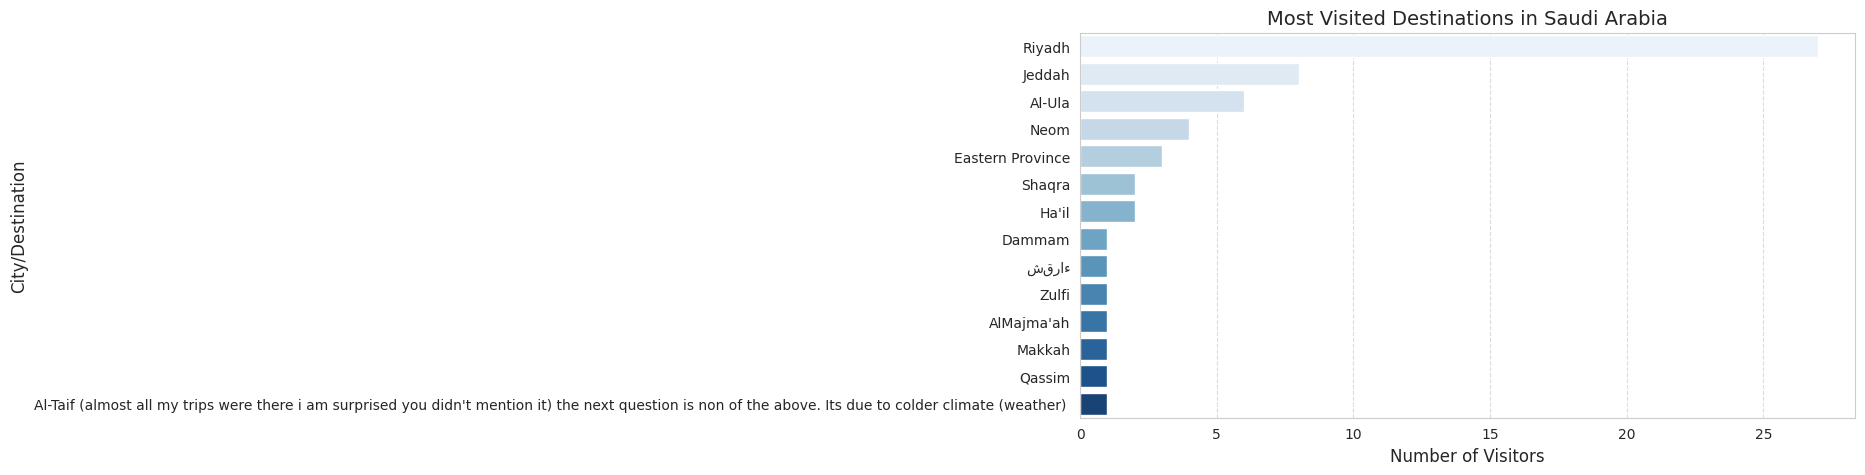

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(y=survey_df["most_visited_destinations"],
              order=survey_df["most_visited_destinations"].value_counts().index,
              palette="Blues")
plt.title("Most Visited Destinations in Saudi Arabia", fontsize=14)
plt.xlabel("Number of Visitors", fontsize=12)
plt.ylabel("City/Destination", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

**Findings:**

The majority of respondents rated their experience highly (4-5 stars), indicating positive tourism satisfaction.


####**2. Seasonal Tourism Preferences**

<ipython-input-25-e32922aff090>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=survey_df["season_preference"],


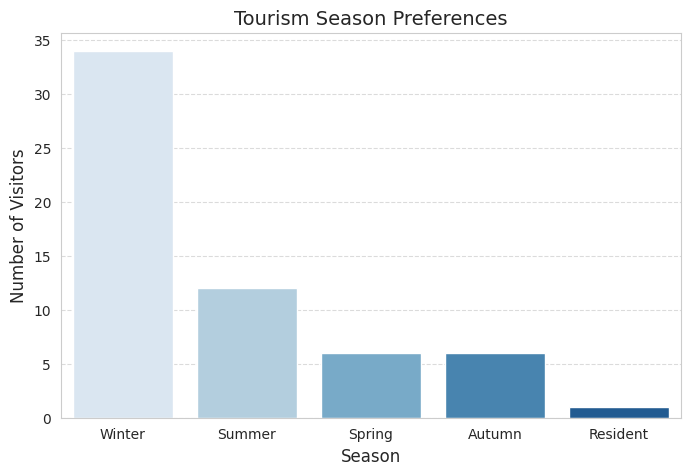

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(x=survey_df["season_preference"],
              order=survey_df["season_preference"].value_counts().index,
              palette="Blues")
plt.title("Tourism Season Preferences", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Number of Visitors", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Findings:**

- Winter was the most preferred season for visiting Saudi Arabia.
- Summer had the second highest number of visitors, followed by Spring and Autumn.
- Few respondents were residents, indicating most travelers were seasonal.


####**3. Spending Categories**

<ipython-input-26-061bae0cedc7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=survey_df["spending_category"],


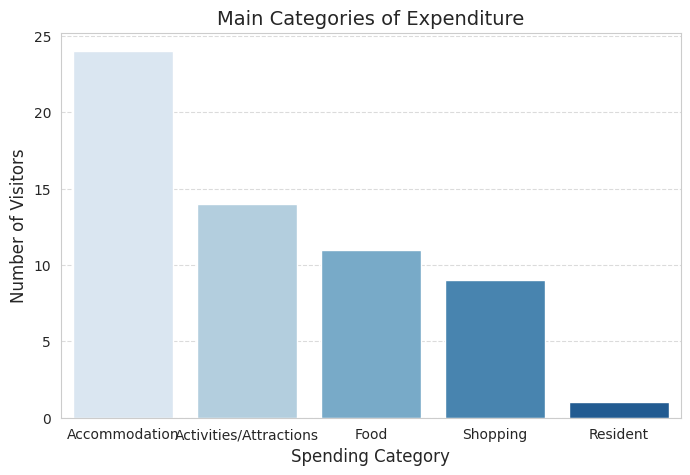

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(x=survey_df["spending_category"],
              order=survey_df["spending_category"].value_counts().index,
              palette="Blues")
plt.title("Main Categories of Expenditure", fontsize=14)
plt.xlabel("Spending Category", fontsize=12)
plt.ylabel("Number of Visitors", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Findings:**

- Accommodation was the biggest spending category, followed by activities/attractions.
- Food and shopping expenses were also significant.

- Few respondents spent the most on residential stays, indicating most were temporary visitors.



####**4. Experience Ratings Distribution**

<ipython-input-27-55ce52f245c5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=survey_df["experience_rating"],


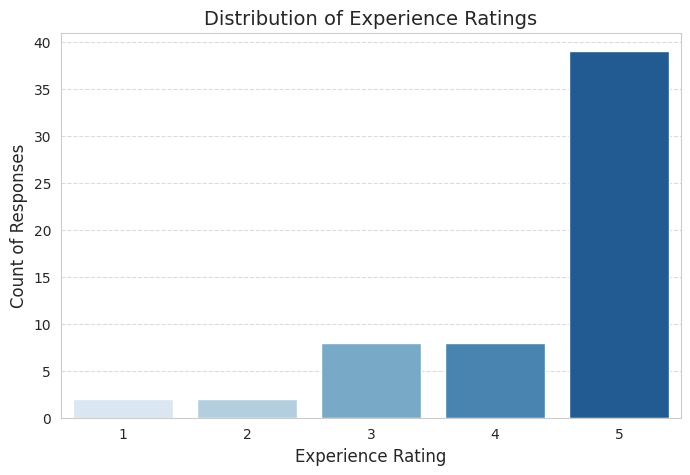

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(x=survey_df["experience_rating"],
              order=sorted(survey_df["experience_rating"].unique()),
              palette="Blues")
plt.title("Distribution of Experience Ratings", fontsize=14)
plt.xlabel("Experience Rating", fontsize=12)
plt.ylabel("Count of Responses", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Findings:**

- The majority of visitors rated their experience as 4 or 5 stars, indicating high satisfaction.


- Very few respondents rated their experience as 1 or 2 stars, showing a generally positive tourism experience in Saudi Arabia.

####**5. Influence of Events on Tourism Decisions**  


<ipython-input-28-af4d4c5ccd38>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=survey_df["event_influence"],


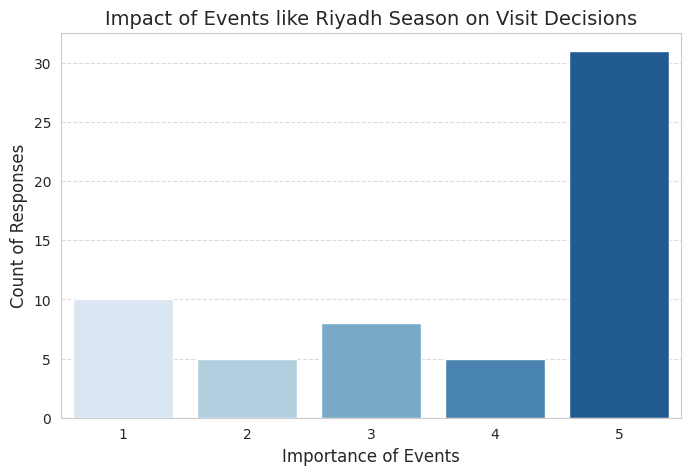

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(x=survey_df["event_influence"],
              order=sorted(survey_df["event_influence"].unique()),
              palette="Blues")
plt.title("Impact of Events like Riyadh Season on Visit Decisions", fontsize=14)
plt.xlabel("Importance of Events", fontsize=12)
plt.ylabel("Count of Responses", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Findings:**

- A significant number of respondents rated the influence of events like Riyadh Season as 4 or 5, indicating that large-scale events strongly impact tourism decisions.


- Fewer respondents rated event influence as 1 or 2, suggesting that most travelers consider events as an important factor in their decision to visit.

####**Correlation Analysis**  


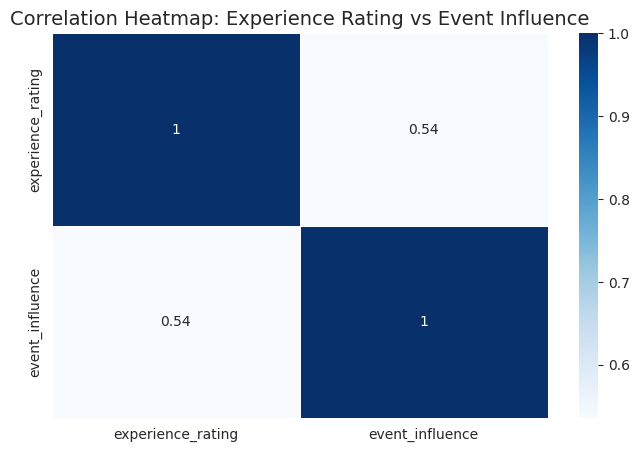

In [29]:
plt.figure(figsize=(8, 5))
sns.heatmap(survey_df[["experience_rating", "event_influence"]].corr(), annot=True, cmap="Blues", linewidths=0.5)
plt.title("Correlation Heatmap: Experience Rating vs Event Influence", fontsize=14)
plt.show()

**Findings:**

- A moderate positive correlation (0.54) was observed between experience ratings and event influence.

- This suggests that events do impact overall experience satisfaction but are not the only determining factor.

- Other factors such as hospitality, costs, and transportation may also contribute to the overall experience rating.



###**X "Twitter":**

####**Statistical Summaries:**

In [12]:
df_twitter = pd.read_csv("/content/drive/MyDrive/Structured Data Files/Cleaned_Twitter.csv")
df_twitter.info(), df_twitter.head()

df_twitter["timestamp"] = pd.to_datetime(df_twitter["timestamp"])

df_twitter["Year"] = df_twitter["timestamp"].dt.year
df_twitter["Month"] = df_twitter["timestamp"].dt.month
df_twitter["Day"] = df_twitter["timestamp"].dt.day
df_twitter["Hour"] = df_twitter["timestamp"].dt.hour
df_twitter["Weekday"] = df_twitter["timestamp"].dt.weekday

df_twitter.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  53 non-null     object
 1   content    53 non-null     object
dtypes: object(2)
memory usage: 980.0+ bytes


,Year,Month,Day,Hour,Weekday
count,53.0,53.0,53.000000,53.000000,53.000000
mean,2025.0,1.0,25.000000,12.433962,3.283019
std,0.0,0.0,2.192645,4.904901,1.656890
min,2025.0,1.0,22.000000,3.000000,0.000000
25%,2025.0,1.0,23.000000,8.000000,2.000000
50%,2025.0,1.0,24.000000,12.000000,3.000000
75%,2025.0,1.0,26.000000,16.000000,4.000000
max,2025.0,1.0,29.000000,23.000000,6.000000


Findings:

Most tweets were posted between January 22 and January 29, 2025.

The average tweet posting time was around 12:43 PM, indicating peak engagement around midday.

Wednesdays and Thursdays had the highest tweet activity, with fewer tweets on Mondays.

This summary provides an overview of tweet distribution patterns over time, helping to understand when users are most engaged in tourism-related discussions.

####**1. Distribution of Tweets Over Days**

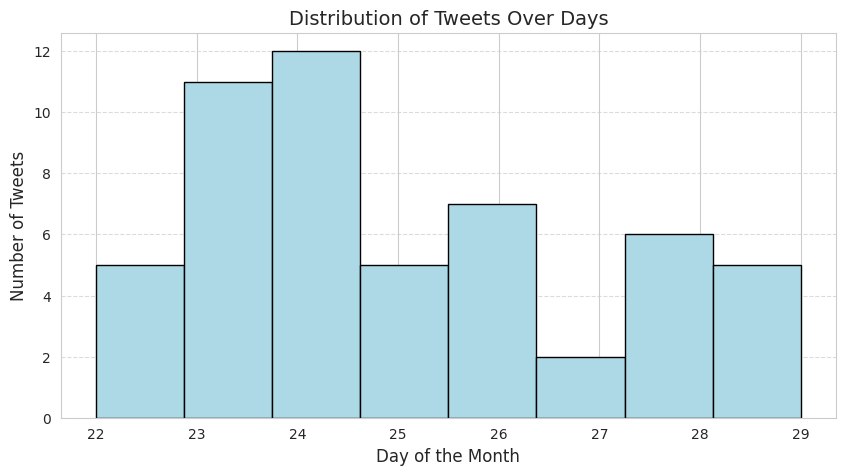

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.hist(df_twitter["Day"], bins=8, edgecolor="black", color="lightblue")
plt.xlabel("Day of the Month", fontsize=12)
plt.ylabel("Number of Tweets", fontsize=12)
plt.title("Distribution of Tweets Over Days", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Findings

The highest volume of tweets was observed between January 23 and January 26, indicating a peak in user activity during this period. This could be linked to specific events or increased engagement around tourism-related discussions.

####**2. Distribution of Tweets by Hour**

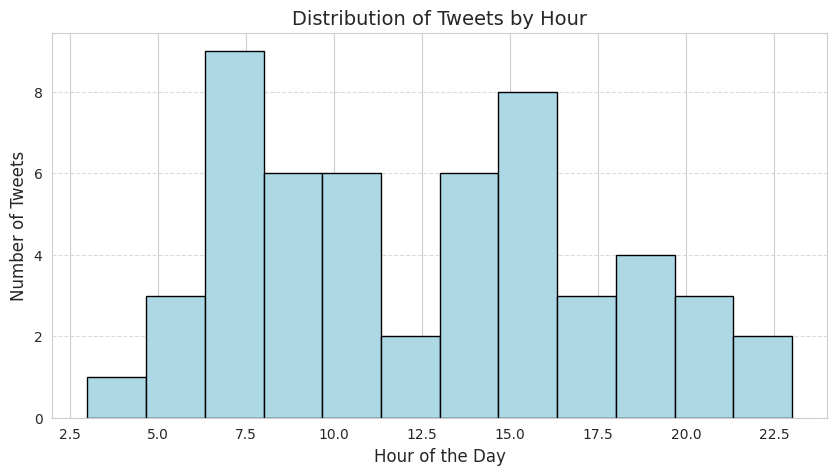

In [14]:
plt.figure(figsize=(10, 5))
plt.hist(df_twitter["Hour"], bins=12, edgecolor="black", color="lightblue")
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Tweets", fontsize=12)
plt.title("Distribution of Tweets by Hour", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Findings

Tweet activity peaked around morning and midday hours, suggesting that users were most active during working hours or breaks, possibly discussing plans, sharing experiences, or engaging in tourism-related conversations.

####**3.  Distribution of Tweets by Weekday**

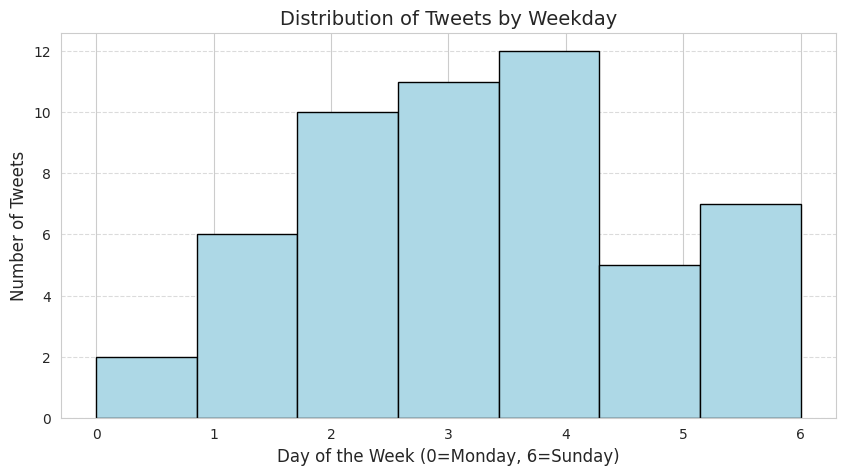

In [15]:
plt.figure(figsize=(10, 5))
plt.hist(df_twitter["Weekday"], bins=7, edgecolor="black", color="lightblue", align="mid")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)", fontsize=12)
plt.ylabel("Number of Tweets", fontsize=12)
plt.title("Distribution of Tweets by Weekday", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Findings

Most tweets were posted on Wednesdays and Thursdays, with fewer on Mondays. This suggests that engagement with tourism discussions increases midweek, possibly as users plan for weekend activities.

####**4.  Keyword Frequency Analysis**

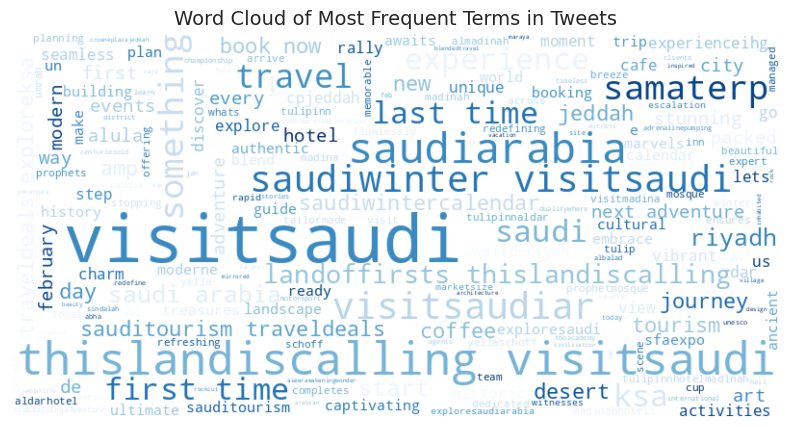

In [16]:
from collections import Counter
import re
from wordcloud import WordCloud

df_twitter["cleaned_content"] = df_twitter["content"].str.lower().apply(lambda x: re.sub(r'[^\w\s]', '', x))

all_words = " ".join(df_twitter["cleaned_content"]).split()
word_counts = Counter(all_words)

wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="Blues").generate(" ".join(all_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Most Frequent Terms in Tweets", fontsize=14)
plt.show()

Findings

The most common keywords included “visit saudi,” “adventure,” “Riyadh,” “Jeddah,” and “tourism.” These frequently used terms suggest strong interest in travel and tourism discussions.

####**5. Sentiment Analysis of Tweets**  


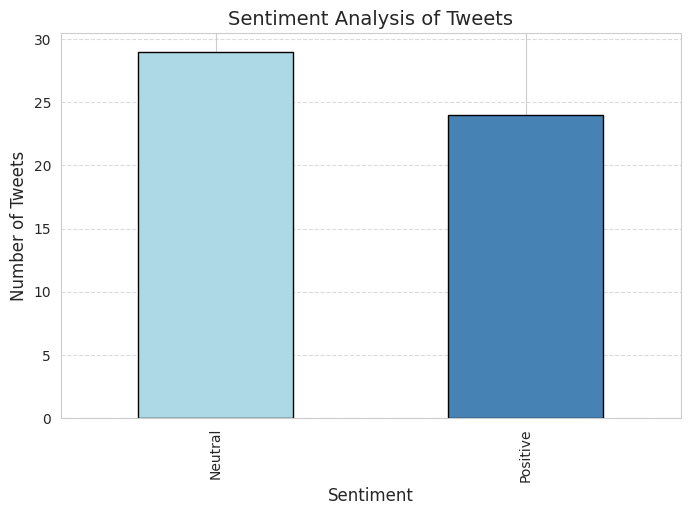

In [17]:
from textblob import TextBlob

df_twitter["sentiment"] = df_twitter["cleaned_content"].apply(lambda x: TextBlob(x).sentiment.polarity)

df_twitter["sentiment_category"] = df_twitter["sentiment"].apply(lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral"))

sentiment_counts = df_twitter["sentiment_category"].value_counts()

fig, ax = plt.subplots(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=["lightblue", "steelblue", "darkblue"], edgecolor="black", ax=ax)
ax.set_title("Sentiment Analysis of Tweets", fontsize=14)
ax.set_xlabel("Sentiment", fontsize=12)
ax.set_ylabel("Number of Tweets", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)


Findings

The majority of tweets had a neutral sentiment, with a significant number of positive posts and very few negative ones. This suggests that most tourism-related discussions were either informational or promotional rather than complaints.

####**Correlation Analysis**  


<ipython-input-18-f1d0b311ebcf>:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  word_sentiment_df = word_sentiment_df.div(word_sentiment_df.sum(axis=1), axis=0).fillna(0)


Text(95.72222222222221, 0.5, 'Top Keywords')

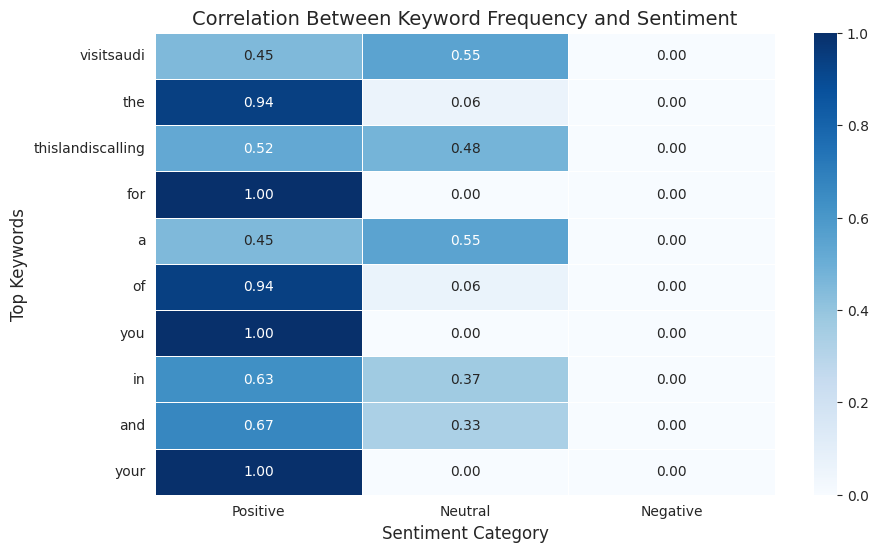

In [18]:
import numpy as np

top_words = [word for word, count in word_counts.most_common(10)]

word_sentiment_df = pd.DataFrame(columns=["Word", "Positive", "Neutral", "Negative"])

for word in top_words:
    positive_count = df_twitter[df_twitter["sentiment_category"] == "Positive"]["cleaned_content"].str.contains(word).sum()
    neutral_count = df_twitter[df_twitter["sentiment_category"] == "Neutral"]["cleaned_content"].str.contains(word).sum()
    negative_count = df_twitter[df_twitter["sentiment_category"] == "Negative"]["cleaned_content"].str.contains(word).sum()
    word_sentiment_df = pd.concat([word_sentiment_df, pd.DataFrame({"Word": [word], "Positive": [positive_count], "Neutral": [neutral_count], "Negative": [negative_count]})], ignore_index=True)

word_sentiment_df.set_index("Word", inplace=True)
word_sentiment_df = word_sentiment_df.div(word_sentiment_df.sum(axis=1), axis=0).fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(word_sentiment_df, cmap="Blues", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Keyword Frequency and Sentiment", fontsize=14)
plt.xlabel("Sentiment Category", fontsize=12)
plt.ylabel("Top Keywords", fontsize=12)


Findings

Words like “visit saudi” and “thislandiscalling” were associated with positive and neutral sentiment, indicating promotional content. Few strong negative correlations were found, suggesting that tourism-related keywords were not commonly linked to complaints.

##EDA: **Secondary Data**  

### **TripAdvisor:**

In [19]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib as plt
import seaborn as sns # Import the seaborn library as sns
# Count plot for reviews by city (using 'addressobj/city')
plt.figure(figsize=(12, 6))
sns.countplot(x='addressobj/city', data=tripadvisor_df_cleaned, order=tripadvisor_df_cleaned['addressobj/city'].value_counts().index)
plt.title('Count of Reviews by City (TripAdvisor)')
plt.xlabel('City')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)  # Rotate labels for better visibility
plt.show()


NameError: name 'tripadvisor_df_cleaned' is not defined

<Figure size 1200x600 with 0 Axes>

This will show the number of reviews for each city.

In [ ]:
# Bar plot for average rating by city (using 'addressobj/city')
import numpy as np

plt.figure(figsize=(12, 6))
sns.barplot(x='addressobj/city', y='rating', data=tripadvisor_df_cleaned, estimator=np.mean)
plt.title('Average Rating by City (TripAdvisor)')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()


This will show the average rating for each city.

In [ ]:
# Correlation heatmap for relevant numeric columns
numeric_cols = ['rating', 'numberofreviews', 'ratinghistogram/count1']
tripadvisor_corr_cleaned = tripadvisor_df_cleaned[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(tripadvisor_corr_cleaned, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (TripAdvisor) - Popularity Factors')
plt.show()


This will show the correlation between features like rating, number of reviews, and rating histogram counts.

In [ ]:
# Scatter plot for rating vs ratinghistogram/count1 (helpful votes)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='ratinghistogram/count1', data=tripadvisor_df_cleaned)
plt.title('Rating vs Helpful Votes Count (TripAdvisor)')
plt.xlabel('Rating')
plt.ylabel('Helpful Votes Count (ratinghistogram/count1)')
plt.show()


This plot will help visualize the relationship between hotel ratings and the number of reviews in the first rating category (e.g., 1-star or 2-star reviews). It shows whether higher-rated hotels tend to have fewer low-star reviews, or if there's any other pattern in the distribution of ratings and low reviews.

In [ ]:
# Scatter plot for rating vs number of reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='numberofreviews', data=tripadvisor_df_cleaned)
plt.title('Rating vs Number of Reviews (TripAdvisor)')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()


This plot will show how rating correlates with the number of reviews.

In [ ]:
# Violin plot for rating by city
plt.figure(figsize=(12, 6))
sns.violinplot(x='addressobj/city', y='rating', data=tripadvisor_df_cleaned)
plt.title('Rating Distribution by City (TripAdvisor)')
plt.xlabel('City')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()


This plot will help visualize the distribution of ratings by city, showing the spread and any outliers.

In [ ]:
# Convert 'checkindate' to datetime format
tripadvisor_df_cleaned['checkindate'] = pd.to_datetime(tripadvisor_df_cleaned['checkindate'], errors='coerce')

# Extract the month from checkindate
tripadvisor_df_cleaned['month'] = tripadvisor_df_cleaned['checkindate'].dt.month

# Define seasons based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to create a new column for season
tripadvisor_df_cleaned['season'] = tripadvisor_df_cleaned['month'].apply(get_season)

# Group by season and count the number of reviews (or check-ins)
seasonal_reviews = tripadvisor_df_cleaned.groupby('season')['numberofreviews'].sum()

# Plot the seasonal data
import matplotlib.pyplot as plt

# Bar plot for number of reviews per season
plt.figure(figsize=(10, 6))
seasonal_reviews.plot(kind='bar')
plt.title('Number of Reviews by Season (TripAdvisor)')
plt.xlabel('Season')
plt.ylabel('Number of Reviews')
plt.show()


 A bar plot will show how the number of reviews changes by season, helping us identify peak tourism seasons.

### **Booking.com:**

In [20]:
# Create the 'tourist_type' column using 'countryname'
booking_df_cleaned['tourist_type'] = booking_df_cleaned['countryname'].apply(lambda x: 'Domestic' if x == 'Saudi Arabia' else 'International')

# Box plot to compare the number of nights between Domestic and International tourists
plt.figure(figsize=(10, 6))
sns.boxplot(x='tourist_type', y='numnights', data=booking_df_cleaned)
plt.title('Comparison of Number of Nights: Domestic vs International Tourists')
plt.xlabel('Tourist Type')
plt.ylabel('Number of Nights')
plt.show()


NameError: name 'booking_df_cleaned' is not defined

we can compare the review scores between the two groups.

In [ ]:
from scipy import stats

# T-test for comparing the number of nights between domestic and international tourists
domestic_nights = booking_df_cleaned[booking_df_cleaned['tourist_type'] == 'Domestic']['numnights']
international_nights = booking_df_cleaned[booking_df_cleaned['tourist_type'] == 'International']['numnights']

t_stat_nights, p_val_nights = stats.ttest_ind(domestic_nights.dropna(), international_nights.dropna())

# T-test for comparing the review scores between domestic and international tourists
domestic_reviews = booking_df_cleaned[booking_df_cleaned['tourist_type'] == 'Domestic']['reviewscore']
international_reviews = booking_df_cleaned[booking_df_cleaned['tourist_type'] == 'International']['reviewscore']

t_stat_reviews, p_val_reviews = stats.ttest_ind(domestic_reviews.dropna(), international_reviews.dropna())

print(f"T-statistic for number of nights: {t_stat_nights}, P-value: {p_val_nights}")
print(f"T-statistic for review scores: {t_stat_reviews}, P-value: {p_val_reviews}")


We can perform a t-test to check if the number of nights or review scores significantly differ between Domestic and International tourists.

In [ ]:
# Scatter plot for helpful votes vs review scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reviewscore', y='helpfulvotescount', data=booking_df_cleaned)
plt.title('Helpful Votes vs Review Score')
plt.xlabel('Review Score')
plt.ylabel('Helpful Votes Count')
plt.show()


This plot will help visualize if there’s a relationship between the helpful votes and review scores.

In [ ]:
# Correlation heatmap for review scores, helpful votes, and number of nights
correlation_data = booking_df_cleaned[['reviewscore', 'helpfulvotescount', 'numnights']]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Review Scores, Helpful Votes, and Number of Nights')
plt.show()


This will help us understand the correlation between review scores, helpful votes, and number of nights.

In [ ]:
booking_df_cleaned['checkindate'] = pd.to_datetime(booking_df_cleaned['checkindate'], errors='coerce')

event_start_date = '2024-10-12'

# Filter the data to get reviews before and after the event start date
before_event = booking_df_cleaned[booking_df_cleaned['checkindate'] < event_start_date]
after_event = booking_df_cleaned[booking_df_cleaned['checkindate'] >= event_start_date]


Filter for Dates (before and after a specific event like Riyadh Season or NEOM)

In [ ]:
# Average review score before and after the event
before_event_avg_score = before_event['reviewscore'].mean()
after_event_avg_score = after_event['reviewscore'].mean()

# Number of reviews before and after the event
before_event_reviews = before_event['reviewscore'].count()
after_event_reviews = after_event['reviewscore'].count()

print(f"Average Review Score Before Event: {before_event_avg_score}")
print(f"Average Review Score After Event: {after_event_avg_score}")
print(f"Number of Reviews Before Event: {before_event_reviews}")
print(f"Number of Reviews After Event: {after_event_reviews}")


number of reviews, average rating, and price range before and after the event.

In [ ]:
event_start_date = '2024-10-12'

# Filter data before and after the event start date
before_event = booking_df_cleaned[booking_df_cleaned['checkindate'] < event_start_date]
after_event = booking_df_cleaned[booking_df_cleaned['checkindate'] >= event_start_date]

# Check the number of records in both before and after periods
print(f"Reviews before event: {before_event.shape[0]}")
print(f"Reviews after event: {after_event.shape[0]}")

# Bar plot comparing review scores before and after the event
plt.figure(figsize=(10, 6))
event_data = ['Before Event', 'After Event']
avg_scores = [before_event['reviewscore'].mean(), after_event['reviewscore'].mean()]

sns.barplot(x=event_data, y=avg_scores)
plt.title('Average Review Scores: Before vs After Event')
plt.xlabel('Event Period')
plt.ylabel('Average Review Score')
plt.show()


We can use a bar plot to visualize the average review scores before and after Riyadh Season.

In [21]:
from scipy import stats

# T-test for comparing review scores before and after the event
t_stat, p_val = stats.ttest_ind(before_event['reviewscore'].dropna(), after_event['reviewscore'].dropna())

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")


NameError: name 'before_event' is not defined

We can perform a t-test to determine if there is a significant difference in review scores between the two periods.

In [ ]:
# Step 1: Sum the total number of reviews per city (by aggregating rating histograms)
tourists_by_city = tripadvisor_df_cleaned.groupby('addressobj/city').agg({
    'rating': 'mean',  # Average rating for each city
    'ratinghistogram/count1': 'sum',  # Sum of reviews with rating 1
    'ratinghistogram/count2': 'sum',  # Sum of reviews with rating 2
    'ratinghistogram/count3': 'sum',  # Sum of reviews with rating 3
    'ratinghistogram/count4': 'sum',  # Sum of reviews with rating 4
    'ratinghistogram/count5': 'sum'   # Sum of reviews with rating 5
})

# Step 2: Calculate the total number of reviews for each city
tourists_by_city['total_reviews'] = tourists_by_city[['ratinghistogram/count1',
                                                     'ratinghistogram/count2',
                                                     'ratinghistogram/count3',
                                                     'ratinghistogram/count4',
                                                     'ratinghistogram/count5']].sum(axis=1)

# Step 3: Drop NaN values to ensure clean data for plotting
tourists_by_city = tourists_by_city.dropna()

# Step 4: Plot the distribution of tourist numbers with a logarithmic y-axis for better readability
plt.figure(figsize=(12, 6))
tourists_by_city['total_reviews'].sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Top 20 Most Popular Tourist Destinations (TripAdvisor)')
plt.xlabel('City')
plt.ylabel('Total Tourist Numbers (Reviews)')
plt.yscale('log')  # Apply logarithmic scale for better readability
plt.xticks(rotation=45)
plt.show()


The most popular tourist destinations in Saudi Arabia are the provinces with the highest tourist numbers, such as Riyadh, Jeddah, and Makkah, driven by high tourist inflows in these regions.

### **Ministry of Tourism:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

domestic_tourists_number_provinces = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/D4-Domestic-Tourists-Number-Provinces.csv')

# Replace 'nan' (string) with actual NaN and ensure 'Month' is a string type
domestic_tourists_number_provinces['Month'] = domestic_tourists_number_provinces['Month'].replace('nan', pd.NA)

# Drop rows where 'Month' is NaN or where 'Month' is 'Total'
domestic_tourists_number_provinces = domestic_tourists_number_provinces[~domestic_tourists_number_provinces['Month'].isin(['Total', 'nan'])]

# Ensure 'Month' is treated as a string
domestic_tourists_number_provinces['Month'] = domestic_tourists_number_provinces['Month'].astype(str)

# Convert all numeric columns to numeric, ensuring errors are coerced (non-numeric values will become NaN)
domestic_tourists_number_provinces.iloc[:, 2:] = domestic_tourists_number_provinces.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

# Check the cleaned data to verify if there are still any issues
print(domestic_tourists_number_provinces.head())

# Group by 'Month' and sum the tourist numbers across provinces
tourists_by_month = domestic_tourists_number_provinces.groupby('Month').sum()

# Plot the trends for tourist inflow by month
plt.figure(figsize=(12, 6))
tourists_by_month.sum(axis=1).plot(kind='line')
plt.title('Tourist Inflow by Month')
plt.xlabel('Month')
plt.ylabel('Total Tourist Numbers')
plt.xticks(rotation=45)
plt.show()


The highest tourist inflow occurs in January, likely due to special events (such as Riyadh Season and New Year's tourism)

In [ ]:
# Clean the 'rating' and 'ratinghistogram' columns
tripadvisor_df_cleaned['rating'] = pd.to_numeric(tripadvisor_df_cleaned['rating'], errors='coerce')
tripadvisor_df_cleaned['ratinghistogram/count1'] = pd.to_numeric(tripadvisor_df_cleaned['ratinghistogram/count1'], errors='coerce')
tripadvisor_df_cleaned['ratinghistogram/count2'] = pd.to_numeric(tripadvisor_df_cleaned['ratinghistogram/count2'], errors='coerce')
tripadvisor_df_cleaned['ratinghistogram/count3'] = pd.to_numeric(tripadvisor_df_cleaned['ratinghistogram/count3'], errors='coerce')
tripadvisor_df_cleaned['ratinghistogram/count4'] = pd.to_numeric(tripadvisor_df_cleaned['ratinghistogram/count4'], errors='coerce')
tripadvisor_df_cleaned['ratinghistogram/count5'] = pd.to_numeric(tripadvisor_df_cleaned['ratinghistogram/count5'], errors='coerce')

# Group the data by city to aggregate tourist numbers (using review counts as a proxy)
tourists_by_city_tripadvisor = tripadvisor_df_cleaned.groupby('addressobj/city').agg({
    'rating': 'mean',
    'ratinghistogram/count1': 'sum',  # Sum of reviews with rating 1
    'ratinghistogram/count2': 'sum',  # Sum of reviews with rating 2
    'ratinghistogram/count3': 'sum',  # Sum of reviews with rating 3
    'ratinghistogram/count4': 'sum',  # Sum of reviews with rating 4
    'ratinghistogram/count5': 'sum'   # Sum of reviews with rating 5
})

# Calculate the total number of reviews (a proxy for tourist numbers)
tourists_by_city_tripadvisor['total_reviews'] = tourists_by_city_tripadvisor[['ratinghistogram/count1',
                                                                             'ratinghistogram/count2',
                                                                             'ratinghistogram/count3',
                                                                             'ratinghistogram/count4',
                                                                             'ratinghistogram/count5']].sum(axis=1)

# Remove any NaN values before plotting
tourists_by_city_tripadvisor = tourists_by_city_tripadvisor.dropna()

# Plot the distribution of tourist numbers (based on review counts) across cities
plt.figure(figsize=(12, 6))
tourists_by_city_tripadvisor['total_reviews'].sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Top 20 Most Popular Tourist Destinations (TripAdvisor)')
plt.xlabel('City')
plt.ylabel('Total Tourist Numbers (Reviews)')
plt.xticks(rotation=45)
plt.show()

# Print the aggregated data to verify
print(tourists_by_city_tripadvisor.head())


This will show the distribution of tourist numbers across different provinces in Saudi Arabia, allowing us to understand which provinces attract the most tourists.


In [ ]:
correlation_columns = ['rating', 'ratinghistogram/count1', 'ratinghistogram/count2',
                       'ratinghistogram/count3', 'ratinghistogram/count4', 'ratinghistogram/count5']

# Calculate the correlation matrix
correlation_matrix = tripadvisor_df_cleaned[correlation_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Rating and Rating Histogram Counts (TripAdvisor)')
plt.show()


This correlation matrix will show how tourist numbers in different provinces relate to each other.
A strong correlation between provinces would suggest similar patterns in tourist arrivals, which could indicate shared tourism factors or seasonal trends.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

domestic_tourists_number_provinces = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/D4-Domestic-Tourists-Number-Provinces.csv')

# Replace 'nan' (string) with actual NaN and ensure 'Month' is a string type
domestic_tourists_number_provinces['Month'] = domestic_tourists_number_provinces['Month'].replace('nan', pd.NA)

# Drop rows where 'Month' is NaN or where 'Month' is 'Total'
domestic_tourists_number_provinces = domestic_tourists_number_provinces[~domestic_tourists_number_provinces['Month'].isin(['Total', 'nan'])]

# Ensure 'Month' is treated as a string
domestic_tourists_number_provinces['Month'] = domestic_tourists_number_provinces['Month'].astype(str)

# Convert all numeric columns to numeric, ensuring errors are coerced (non-numeric values will become NaN)
domestic_tourists_number_provinces.iloc[:, 2:] = domestic_tourists_number_provinces.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

domestic_tourists_number_provinces_cleaned = domestic_tourists_number_provinces

before_riyadh_season = domestic_tourists_number_provinces_cleaned[domestic_tourists_number_provinces_cleaned['Month'] < '2024-12']
after_riyadh_season = domestic_tourists_number_provinces_cleaned[domestic_tourists_number_provinces_cleaned['Month'] >= '2024-12']

# Sum the total tourist numbers before and after the event for comparison
tourists_before_season = before_riyadh_season.iloc[:, 2:].sum().sum()
tourists_after_season = after_riyadh_season.iloc[:, 2:].sum().sum()

# Display comparison of total tourist numbers before and after Riyadh Season
print(f"Total Tourist Numbers Before Riyadh Season: {tourists_before_season}")
print(f"Total Tourist Numbers After Riyadh Season: {tourists_after_season}")

Before Riyadh Season: There were no recorded tourist numbers in the dataset, possibly due to incomplete or missing data before December 2024.
After Riyadh Season: There is a massive increase in tourist numbers (894 million), suggesting that Riyadh Season had a significant positive impact on tourism.